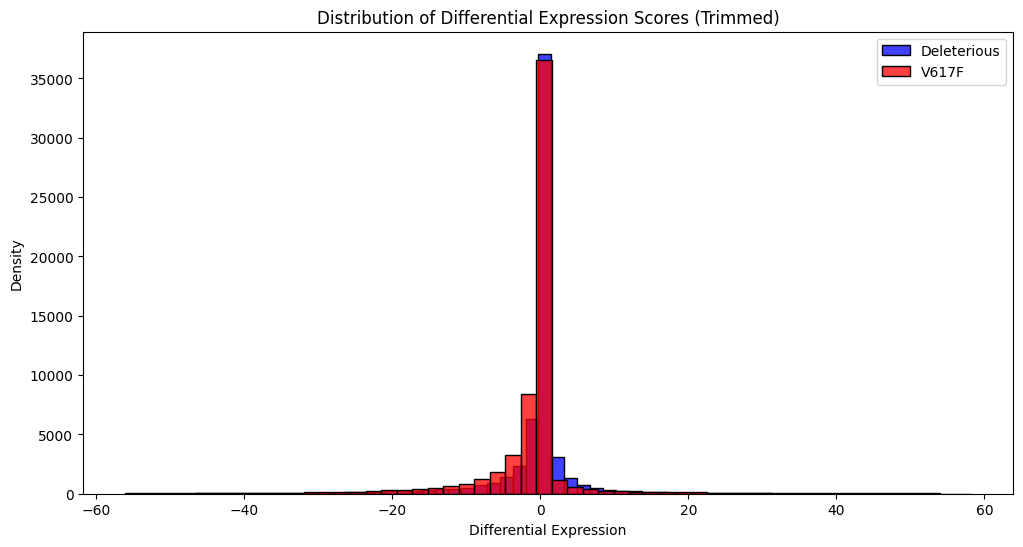

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
deleterious_file = 'Deleterious/deleterious.tsv'
v617f_file = 'V617F/v617f.tsv'
baseline_file = 'baseline/gene_mean_expression.tsv'

# Load data with gene_id as string and other columns as float
baseline_df = pd.read_csv(baseline_file, sep='\s+', dtype={'gene_id': str}, engine='python')
deleterious_df = pd.read_csv(deleterious_file, sep='\s+', dtype={'gene_id': str}, engine='python')
v617f_df = pd.read_csv(v617f_file, sep='\s+', dtype={'gene_id': str}, engine='python')

# Convert other columns to float
for df in [baseline_df, deleterious_df, v617f_df]:
    df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

# Calculate the differential expression for deleterious and v617f
deleterious_df['diff_expression'] = deleterious_df['average'] - baseline_df['trimmed_mean_expression']
v617f_df['diff_expression'] = v617f_df['average'] - baseline_df['trimmed_mean_expression']

# Trim outliers for better plotting
def trim_outliers(df, column, lower_percentile=1, upper_percentile=99):
    lower_bound = np.percentile(df[column], lower_percentile)
    upper_bound = np.percentile(df[column], upper_percentile)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

trimmed_deleterious_df = trim_outliers(deleterious_df, 'diff_expression')
trimmed_v617f_df = trim_outliers(v617f_df, 'diff_expression')

# Plot the distribution of differential scores after trimming outliers
plt.figure(figsize=(12, 6))
sns.histplot(trimmed_deleterious_df['diff_expression'], bins=50, color='blue', label='Deleterious', kde=False)
sns.histplot(trimmed_v617f_df['diff_expression'], bins=50, color='red', label='V617F', kde=False)
plt.title('Distribution of Differential Expression Scores (Trimmed)')
plt.xlabel('Differential Expression')
plt.ylabel('Density')
plt.legend()
plt.show()


In [2]:
from scipy.stats import zscore

# Calculate Z-scores for differential expression
deleterious_df['zscore'] = zscore(deleterious_df['diff_expression'])
v617f_df['zscore'] = zscore(v617f_df['diff_expression'])

# Filter out highly volatile genes by applying an additional filter based on the standard deviation
def filter_volatile_genes(df, std_threshold=1000):
    gene_std = df.iloc[:, 1:-2].std(axis=1)
    return df[gene_std <= std_threshold]

filtered_deleterious_df = filter_volatile_genes(deleterious_df)
filtered_v617f_df = filter_volatile_genes(v617f_df)

# Sort by zscore to find the most consistently over/underexpressed
sorted_deleterious = filtered_deleterious_df.sort_values(by='zscore', ascending=False)
sorted_v617f = filtered_v617f_df.sort_values(by='zscore', ascending=False)

# Create a DataFrame showing the top and bottom consistently expressed genes
consistent_overexpressed_deleterious = sorted_deleterious.head(10)
consistent_underexpressed_deleterious = sorted_deleterious.tail(10)

consistent_overexpressed_v617f = sorted_v617f.head(10)
consistent_underexpressed_v617f = sorted_v617f.tail(10)

print("Most Consistently Overexpressed Genes in Deleterious Mutation:")
display(consistent_overexpressed_deleterious[['gene_id', 'diff_expression', 'zscore']])

print("\nMost Consistently Underexpressed Genes in Deleterious Mutation:")
display(consistent_underexpressed_deleterious[['gene_id', 'diff_expression', 'zscore']])

print("\nMost Consistently Overexpressed Genes in V617F Mutation:")
display(consistent_overexpressed_v617f[['gene_id', 'diff_expression', 'zscore']])

print("\nMost Consistently Underexpressed Genes in V617F Mutation:")
display(consistent_underexpressed_v617f[['gene_id', 'diff_expression', 'zscore']])


Most Consistently Overexpressed Genes in Deleterious Mutation:


,gene_id,diff_expression,zscore
19203,ENSG00000201793.1,802.123868,1.153566
20738,ENSG00000207008.1,798.978509,1.149038
6592,ENSG00000132465.12,778.986580,1.120259
39967,ENSG00000251791.1,744.130061,1.070082
30154,ENSG00000231500.7,741.136119,1.065772
3419,ENSG00000107447.8,728.161471,1.047095
17205,ENSG00000196747.4,717.928239,1.032364
54076,ENSG00000276966.2,645.845119,0.928598
35328,ENSG00000239899.3,644.440848,0.926576
24322,ENSG00000222489.1,632.134744,0.908861



Most Consistently Underexpressed Genes in Deleterious Mutation:


,gene_id,diff_expression,zscore
54292,ENSG00000277437.1,-1009.234156,-1.453940
13247,ENSG00000172232.10,-1086.814941,-1.565620
47625,ENSG00000264063.1,-1237.976050,-1.783221
35308,ENSG00000239839.7,-1305.871678,-1.880959
17453,ENSG00000197561.7,-1307.491806,-1.883291
8421,ENSG00000143546.10,-2865.450372,-4.126020
95,ENSG00000005381.8,-3573.953991,-5.145933
5316,ENSG00000122862.5,-4029.528700,-5.801746
1875,ENSG00000090382.7,-4480.133584,-6.450406
10947,ENSG00000163220.11,-6777.776156,-9.757933



Most Consistently Overexpressed Genes in V617F Mutation:


,gene_id,diff_expression,zscore
9070,ENSG00000148303.17,1583.719050,4.085351
4780,ENSG00000118181.11,1379.872080,3.559251
8268,ENSG00000142676.14,1275.039745,3.288694
8245,ENSG00000142541.18,1254.238675,3.235010
2261,ENSG00000100316.16,1167.015225,3.009898
8293,ENSG00000142937.12,1040.312575,2.682897
1822,ENSG00000089157.16,1037.876250,2.676609
8492,ENSG00000143947.14,1022.033435,2.635721
7542,ENSG00000137818.12,962.656150,2.482477
3089,ENSG00000105372.8,954.275475,2.460847



Most Consistently Underexpressed Genes in V617F Mutation:


,gene_id,diff_expression,zscore
35308,ENSG00000239839.7,-1158.823525,-2.992759
12325,ENSG00000168298.7,-1165.267200,-3.009389
47625,ENSG00000264063.1,-1240.592000,-3.203792
5316,ENSG00000122862.5,-2515.929700,-6.495256
8421,ENSG00000143546.10,-2635.600700,-6.804110
1875,ENSG00000090382.7,-4142.749350,-10.693845
39811,ENSG00000251562.8,-4211.118300,-10.870295
10947,ENSG00000163220.11,-6382.674200,-16.474771
37327,ENSG00000244734.4,-9212.159725,-23.777269
53691,ENSG00000276168.1,-82605.311875,-213.194503


In [10]:
# Apply robust similarity filter
def apply_similarity_filter(df, avg_column='average', std_threshold=1000):
    # Filter based on standard deviation
    df_filtered = filter_volatile_genes(df, std_threshold=std_threshold)
    
    # Apply similarity filter based on the filtered data
    def similarity_check(row, avg_value):
        return ((row >= 0.5 * avg_value) & (row <= 1.5 * avg_value)).mean()

    # Use .loc to safely assign to the DataFrame
    df_filtered.loc[:, 'similarity_filter'] = df_filtered.apply(
        lambda row: similarity_check(row.iloc[1:-2], row[avg_column]), axis=1)
    
    # Keep genes where more than 75% of cases are outside the similarity range
    df_final_filtered = df_filtered[df_filtered['similarity_filter'] <= 0.75]
    return df_final_filtered

robust_filtered_deleterious = apply_similarity_filter(deleterious_df)
robust_filtered_v617f = apply_similarity_filter(v617f_df)

# Sort and display the most over/underexpressed genes after applying the filter
filtered_sorted_deleterious = robust_filtered_deleterious.sort_values(by='diff_expression', ascending=False)
filtered_sorted_v617f = robust_filtered_v617f.sort_values(by='diff_expression', ascending=False)

print("Filtered and Sorted Over/Underexpressed Genes in Deleterious Mutation:")
display(filtered_sorted_deleterious[['gene_id', 'diff_expression']])

print("\nFiltered and Sorted Over/Underexpressed Genes in V617F Mutation:")
display(filtered_sorted_v617f[['gene_id', 'diff_expression']])


/var/folders/5m/w0rlpsxd7yx_97nl1gx0dfzm0000gn/T/ipykernel_36294/4235935675.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'similarity_filter'] = df_filtered.apply(


Filtered and Sorted Over/Underexpressed Genes in Deleterious Mutation:


/var/folders/5m/w0rlpsxd7yx_97nl1gx0dfzm0000gn/T/ipykernel_36294/4235935675.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'similarity_filter'] = df_filtered.apply(


,gene_id,diff_expression
19203,ENSG00000201793.1,802.123868
20738,ENSG00000207008.1,798.978509
6592,ENSG00000132465.12,778.986580
39967,ENSG00000251791.1,744.130061
3419,ENSG00000107447.8,728.161471
...,...,...
8421,ENSG00000143546.10,-2865.450372
95,ENSG00000005381.8,-3573.953991
5316,ENSG00000122862.5,-4029.528700
1875,ENSG00000090382.7,-4480.133584



Filtered and Sorted Over/Underexpressed Genes in V617F Mutation:


,gene_id,diff_expression
4780,ENSG00000118181.11,1379.872080
8268,ENSG00000142676.14,1275.039745
1822,ENSG00000089157.16,1037.876250
8492,ENSG00000143947.14,1022.033435
7542,ENSG00000137818.12,962.656150
...,...,...
1875,ENSG00000090382.7,-4142.749350
39811,ENSG00000251562.8,-4211.118300
10947,ENSG00000163220.11,-6382.674200
37327,ENSG00000244734.4,-9212.159725


In [8]:
# Find common genes that are consistently over/underexpressed in both mutations
common_overexpressed = pd.merge(filtered_sorted_deleterious.head(200), filtered_sorted_v617f.head(200), on='gene_id', suffixes=('_deleterious', '_v617f'))
common_underexpressed = pd.merge(filtered_sorted_deleterious.tail(10), filtered_sorted_v617f.tail(10), on='gene_id', suffixes=('_deleterious', '_v617f'))

print("Common Overexpressed Genes in Both Deleterious and V617F Mutations:")
display(common_overexpressed[['gene_id', 'diff_expression_deleterious', 'diff_expression_v617f']])

print("\nCommon Underexpressed Genes in Both Deleterious and V617F Mutations:")
display(common_underexpressed[['gene_id', 'diff_expression_deleterious', 'diff_expression_v617f']])


Common Overexpressed Genes in Both Deleterious and V617F Mutations:


,gene_id,diff_expression_deleterious,diff_expression_v617f
0,ENSG00000110848.8,302.725106,257.389650
1,ENSG00000198918.8,288.900175,376.323025
2,ENSG00000100219.16,244.005324,244.789705
3,ENSG00000227063.5,144.714234,374.568765
4,ENSG00000125356.7,139.226026,241.976160
5,ENSG00000143947.14,137.864897,1022.033435
6,ENSG00000169442.9,127.206821,195.912455
7,ENSG00000142089.16,103.583041,818.228775
8,ENSG00000005022.6,96.178354,204.757210
9,ENSG00000132646.11,89.280756,154.782850



Common Underexpressed Genes in Both Deleterious and V617F Mutations:


,gene_id,diff_expression_deleterious,diff_expression_v617f
0,ENSG00000277437.1,-1009.234156,-1014.310600
1,ENSG00000239839.7,-1305.871678,-1158.823525
2,ENSG00000143546.10,-2865.450372,-2635.600700
3,ENSG00000122862.5,-4029.528700,-2515.929700
4,ENSG00000090382.7,-4480.133584,-4142.749350
5,ENSG00000163220.11,-6777.776156,-6382.674200


In [9]:
# Filter based on high z-score values
significant_deleterious = robust_filtered_deleterious[np.abs(robust_filtered_deleterious['zscore']) > 2]
significant_v617f = robust_filtered_v617f[np.abs(robust_filtered_v617f['zscore']) > 2]

# Find common significant genes in both mutations
common_significant_genes = pd.merge(significant_deleterious, significant_v617f, on='gene_id', suffixes=('_deleterious', '_v617f'))

print("Common Statistically Significant Differentially Expressed Genes:")
display(common_significant_genes[['gene_id', 'zscore_deleterious', 'zscore_v617f']])


Common Statistically Significant Differentially Expressed Genes:


,gene_id,zscore_deleterious,zscore_v617f
0,ENSG00000090382.7,-6.450406,-10.693845
1,ENSG00000122862.5,-5.801746,-6.495256
2,ENSG00000143546.10,-4.126020,-6.804110
3,ENSG00000163220.11,-9.757933,-16.474771
